<a href="https://colab.research.google.com/github/fabianoseller/-Estrutura-de-um-Projeto-/blob/main/Probabilidade_do_usu%C3%A1rio_de_comprar_uma_SUV_SUV_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install pandas scikit-learn matplotlib seaborn statsmodels

# Bbibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm


In [2]:
# Carga
df = pd.read_csv('SUV_Network_Ads.csv')

# 5 primeiras linhas para uma análise inicial
print("Primeiras 5 linhas do dataset:")
print(df.head())

Primeiras 5 linhas do dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0



Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB

Estatísticas descritivas das variáveis numéricas:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   

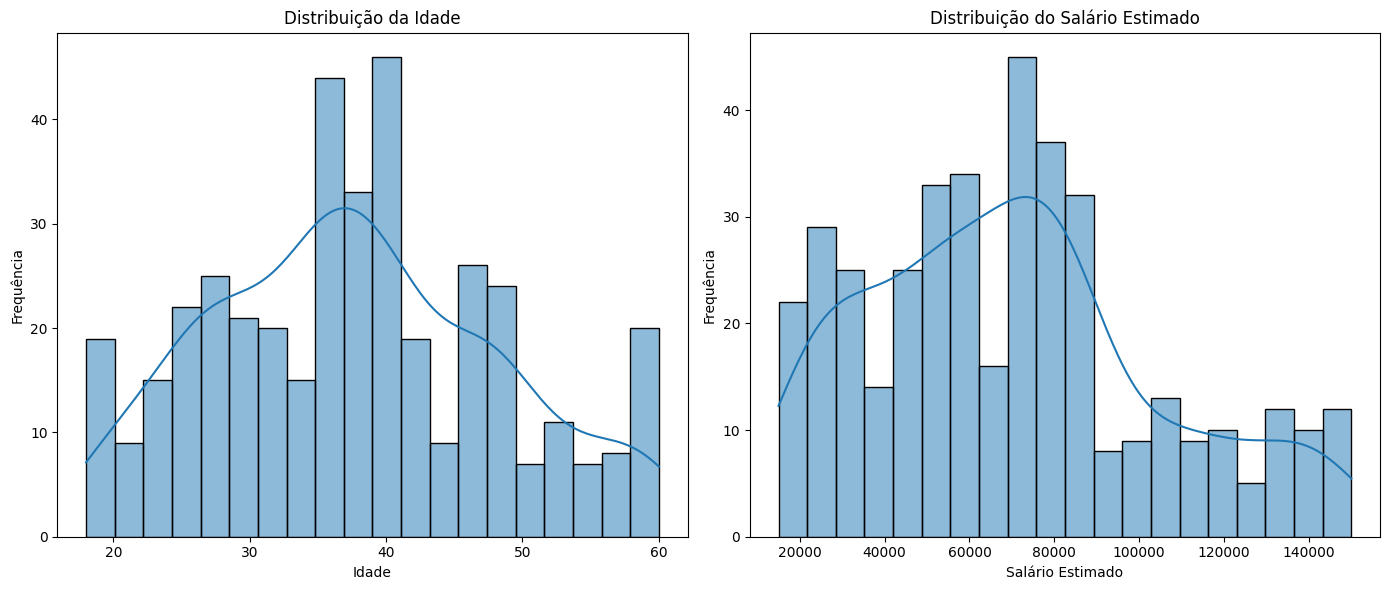

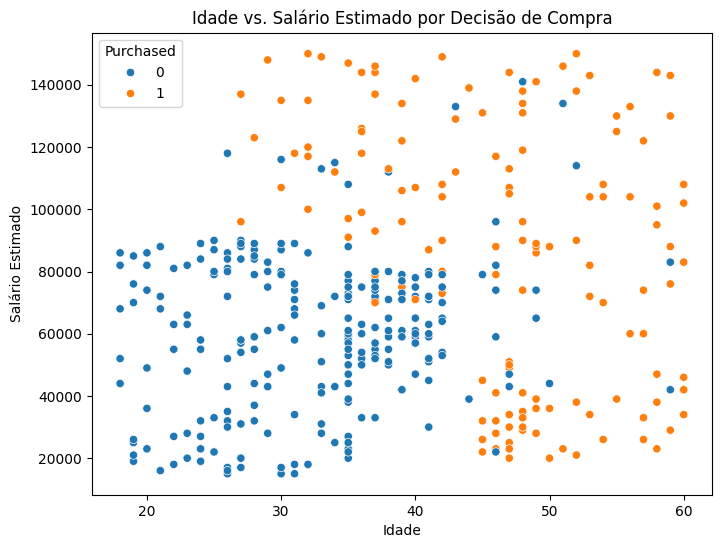

In [3]:
# Tipos de dados e valores não nulos)
print("\nInformações sobre o dataset:")
df.info()

# Estatísticas descritivas
print("\nEstatísticas descritivas das variáveis numéricas:")
print(df.describe())

# Análise da variável alvo 'Purchased'
print("\nContagem de valores na variável 'Purchased':")
print(df['Purchased'].value_counts())

# Visualização da distribuição das variáveis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma da Idade
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribuição da Idade')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Frequência')

# Histograma do Salário Estimado
sns.histplot(df['EstimatedSalary'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribuição do Salário Estimado')
axes[1].set_xlabel('Salário Estimado')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Gráfico de dispersão para visualizar a relação entre as variáveis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)
plt.title('Idade vs. Salário Estimado por Decisão de Compra')
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.show()

In [4]:
# Seleção das variáveis (features e variável alvo)
# 'User ID' é uma variável categórica nominal,
# Esta não é útil para prever o resultado, então a descartamos.
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Divisão dos dados em conjuntos de treino e teste
# 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados (muito importante para regressão logística)
# Usamos o StandardScaler para padronizar as features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criação e treinamento do modelo de regressão logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

print("Modelo de Regressão Logística treinado com sucesso!")

Modelo de Regressão Logística treinado com sucesso!


Matriz de Confusão:
[[50  2]
 [ 9 19]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



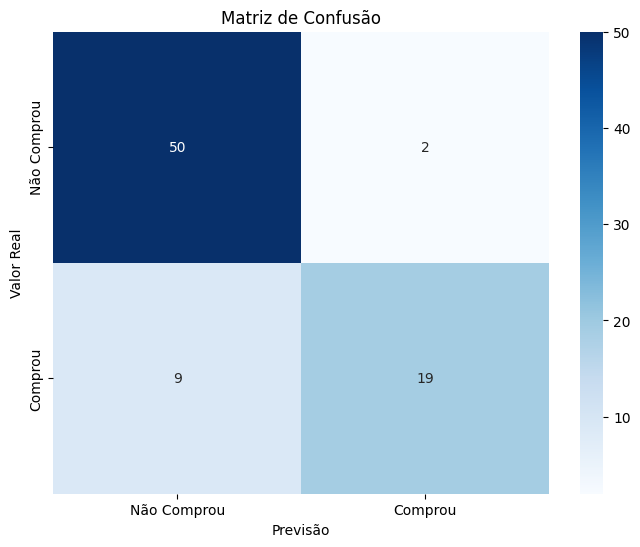

In [5]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Comprou', 'Comprou'], yticklabels=['Não Comprou', 'Comprou'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.show()

# Matriz de Confusão:

## O valor superior esquerdo mostra os "verdadeiros negativos" (pessoas que não compraram e foram previstas como não compradoras).

O valor inferior direito mostra os "verdadeiros positivos" (pessoas que compraram e foram previstas como compradoras).

Acurácia: Um valor próximo de 1 (ou 100%) indica que o modelo acerta a maioria das previsões.

Relatório de Classificação:

Precisão: Dos que o modelo previu como "Compraram", quantos realmente compraram? (Importante para evitar falso-positivos).

Recall: Dos que realmente "Compraram", quantos o modelo conseguiu identificar corretamente? (Importante para evitar falso-negativos).

In [6]:
# Adicionando uma constante ao conjunto de dados para a análise com statsmodels
X_train_scaled_sm = sm.add_constant(X_train_scaled)

# Criação e treinamento do modelo de regressão logística com statsmodels
log_reg_sm = sm.Logit(y_train, X_train_scaled_sm)
result = log_reg_sm.fit()

# Exibindo o resumo do modelo
print(result.summary())

# Calculando o Odds Ratio para cada coeficiente
# O Odds Ratio é o exponencial dos coeficientes
odds_ratios = np.exp(result.params)

# Exibindo os Odds Ratios
print("\nOdds Ratios (razão de chances):")
# Os nomes das colunas são [constante, Age, EstimatedSalary]
#print(f"Odds Ratio para Idade: {odds_ratios[1]:.4f}")
#print(f"Odds Ratio para Salário Estimado: {odds_ratios[2]:.4f}")

print(f"Odds Ratio para Idade: {odds_ratios.iloc[1]:.4f}")
print(f"Odds Ratio para Salário Estimado: {odds_ratios.iloc[2]:.4f}")

Optimization terminated successfully.
         Current function value: 0.372821
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 Sep 2025   Pseudo R-squ.:                  0.4291
Time:                        19:33:47   Log-Likelihood:                -119.30
converged:                       True   LL-Null:                       -208.98
Covariance Type:            nonrobust   LLR p-value:                 1.133e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0391      0.177     -5.860      0.000      -1.387      -0.692
x1             2.1193      0.

# Teste e Validação do Modelo

In [7]:
# Apenas para garantir que o dataframe está carregado
df = pd.read_csv('SUV_Network_Ads.csv')
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


# 1. Fazendo previsões no conjunto de teste
# O modelo prevê a classe (0 ou 1) para cada usuário no conjunto de teste
y_pred = model.predict(X_test_scaled)

# 2. Matriz de Confusão
# A matriz de confusão mostra o número de previsões corretas e incorretas.
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)
print("\n")

# 3. Relatório de Classificação
# O relatório fornece métricas como Acurácia, Precisão, Recall e F1-Score.
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# 4. Acurácia do modelo
# A acurácia é a porcentagem de previsões corretas.
accuracy = model.score(X_test_scaled, y_test)
print(f"Acurácia do Modelo: {accuracy:.2f}")

Matriz de Confusão:
[[50  2]
 [ 9 19]]


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

Acurácia do Modelo: 0.86


# Interpretação dos Resultados:
Matriz de Confusão:

O valor superior esquerdo mostra os "verdadeiros negativos" (pessoas que não compraram e foram previstas como não compradoras).

O valor inferior direito mostra os "verdadeiros positivos" (pessoas que compraram e foram previstas como compradoras).

Acurácia: Um valor próximo de 1 (ou 100%) indica que o modelo acerta a maioria das previsões.

Relatório de Classificação:

Precisão: Dos que o modelo previu como "Compraram", quantos realmente compraram? (Importante para evitar falso-positivos).

Recall: Dos que realmente "Compraram", quantos o modelo conseguiu identificar corretamente? (Importante para evitar falso-negativos).
# 1. Fazendo previsões no conjunto de teste
# O modelo prevê a classe (0 ou 1) para cada usuário no conjunto de teste
y_pred = model.predict(X_test_scaled)

# 2. Matriz de Confusão
# A matriz de confusão mostra o número de previsões corretas e incorretas.
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)
print("\n")

# 3. Relatório de Classificação
# O relatório fornece métricas como Acurácia, Precisão, Recall e F1-Score.
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# 4. Acurácia do modelo
# A acurácia é a porcentagem de previsões corretas.
accuracy = model.score(X_test_scaled, y_test)
print(f"Acurácia do Modelo: {accuracy:.2f}")

Interpretação dos Resultados:
Matriz de Confusão:

O valor superior esquerdo mostra os "verdadeiros negativos" (pessoas que não compraram e foram previstas como não compradoras).

O valor inferior direito mostra os "verdadeiros positivos" (pessoas que compraram e foram previstas como compradoras).

Acurácia: Um valor próximo de 1 (ou 100%) indica que o modelo acerta a maioria das previsões.

Relatório de Classificação:

Precisão: Dos que o modelo previu como "Compraram", quantos realmente compraram? (Importante para evitar falso-positivos).

Recall: Dos que realmente "Compraram", quantos o modelo conseguiu identificar corretamente? (Importante para evitar falso-negativos).

In [8]:
# Adicionando a constante (intercepto) ao conjunto de dados de treino
X_train_scaled_sm = sm.add_constant(X_train_scaled)

# 1. Ajustando o modelo de regressão logística com statsmodels
log_reg_sm = sm.Logit(y_train, X_train_scaled_sm)
result = log_reg_sm.fit()

# 2. Exibindo o resumo completo do modelo
# Essa tabela contém todas as informações estatísticas importantes.
print("Resumo do Modelo:")
print(result.summary())

# 3. Calculando e interpretando o Odds Ratio
# O Odds Ratio é o exponencial do coeficiente de cada variável
odds_ratios = np.exp(result.params)
print("\nOdds Ratios (razão de chances):")
# O aviso de 'FutureWarning' pode aparecer aqui. Use .iloc para ser mais seguro.
print(f"Odds Ratio para Idade: {odds_ratios.iloc[1]:.4f}")
print(f"Odds Ratio para Salário Estimado: {odds_ratios.iloc[2]:.4f}")

Optimization terminated successfully.
         Current function value: 0.372821
         Iterations 7
Resumo do Modelo:
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 Sep 2025   Pseudo R-squ.:                  0.4291
Time:                        19:33:47   Log-Likelihood:                -119.30
converged:                       True   LL-Null:                       -208.98
Covariance Type:            nonrobust   LLR p-value:                 1.133e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0391      0.177     -5.860      0.000      -1.387      -0.692
x1         

# Relatório de Análise do Modelo de Regressão Logística para Compra de SUV

Este relatório apresenta os resultados da modelagem de regressão logística para prever a probabilidade de um usuário comprar uma SUV, com base em sua idade e salário estimado.

## 1\. Otimização e Convergência do Modelo

A execução do modelo de regressão logística resultou na seguinte mensagem:


  * **Otimização Bem-Sucedida:** A mensagem "Optimization terminated successfully." indica que o algoritmo de Máxima Verossimilhança (MLE - Maximum Likelihood Estimation) encontrou os melhores coeficientes para o modelo de forma eficiente e sem problemas.
  * **Iterações:** O processo levou 7 iterações para convergir, o que é um número baixo e sugere que o modelo encontrou rapidamente uma solução estável.
  * **Convergência:** O status "converged: True" confirma que o algoritmo alcançou um ponto de estabilidade onde os coeficientes não podem ser melhorados significativamente, garantindo a validade dos resultados.

-----

## 2\. Resumo do Modelo de Regressão Logística

A tabela a seguir apresenta o resumo estatístico completo do modelo:


 Logit Regression Results                           
============================================================================== Dep. Variable: Purchased No. Observations: 320 Model: Logit Df Residuals: 317 Method: MLE Df Model: 2 Date: Fri, 19 Sep 2025 Pseudo R-squ.: 0.4291 Time: 19:33:47 Log-Likelihood: -119.30 converged: True LL-Null: -208.98 Covariance Type: nonrobust LLR p-value: 1.133e-39
             coef    std err          z      P>|z|      [0.025      0.975]
const -1.0391 0.177 -5.860 0.000 -1.387 -0.692 x1 2.1193 0.266 7.968 0.000 1.598 2.641 x2 1.2208 0.197 6.186 0.000 0.834 1.608


### Análise de Desempenho Global do Modelo

  * **No. Observations (320):** Indica que 320 observações (usuários) foram utilizadas para treinar o modelo.
  * **Pseudo R-squared (0.4291):** Este valor, análogo ao R-quadrado da regressão linear, sugere que aproximadamente **42.91%** da variabilidade na decisão de compra da SUV é explicada pelo modelo. Embora não seja tão diretamente interpretável quanto o R-quadrado, um valor positivo e relativamente alto indica que as variáveis preditoras (Idade e Salário) são relevantes.
  * **Log-Likelihood (-119.30):** É uma medida do ajuste do modelo aos dados. Valores mais próximos de zero indicam um ajuste melhor.
  * **LLR p-value (1.133e-39):** Um p-valor extremamente baixo (próximo de zero) para o Teste da Razão de Verossimilhanças (Likelihood Ratio Test) indica que o modelo como um todo é **estatisticamente significativo**. Isso significa que as variáveis incluídas (Idade e Salário) contribuem significativamente para a previsão da compra da SUV, sendo um modelo superior a um modelo nulo (sem preditores).

### Análise dos Coeficientes e Significância Estatística das Variáveis

| Variável            | Coeficiente (`coef`) | Erro Padrão (`std err`) | Estatística `z` | p-valor (`P>|z|`) |
| :------------------ | :------------------- | :---------------------- | :-------------- | :---------------- |
| `const` (Intercepto) | -1.0391              | 0.177                   | -5.860          | 0.000             |
| `x1` (Idade)        | 2.1193               | 0.266                   | 7.968           | **0.000** |
| `x2` (Salário Estimado) | 1.2208               | 0.197                   | 6.186           | **0.000** |

  * **Coeficientes (`coef`):**
      * **`const` (-1.0391):** É o intercepto do modelo. Ele representa o logaritmo da chance de comprar uma SUV quando todas as variáveis preditoras (idade e salário) são zero. Sua interpretação direta é menos intuitiva, mas é um componente essencial da equação do modelo.
      * **`x1` (Idade - 2.1193):** O coeficiente positivo para a idade indica que, **quanto maior a idade, maior a probabilidade de um usuário comprar uma SUV**.
      * **`x2` (Salário Estimado - 1.2208):** O coeficiente positivo para o salário estimado sugere que **salários mais altos estão associados a uma maior probabilidade de compra de uma SUV**.
  * **p-valor (`P>|z|`):**
      * Para ambas as variáveis (`x1` - Idade e `x2` - Salário Estimado), o p-valor é **0.000**. Este valor é muito menor que o nível de significância comum de 0.05.
      * Isso indica que tanto a **idade quanto o salário estimado são variáveis estatisticamente significativas** para prever a compra de uma SUV. A probabilidade de esses efeitos serem observados por puro acaso é mínima.

-----

## 3\. Interpretação dos Odds Ratios (Razão de Chances)

Os Odds Ratios fornecem uma interpretação mais intuitiva do impacto das variáveis na chance de compra da SUV:



  * **Odds Ratio para Idade (8.3256):**

      * Para cada **aumento de uma unidade na Idade**, a chance (odds) de um usuário comprar uma SUV **multiplica por 8.3256**.
      * Em termos percentuais, isso significa que a chance de compra é aproximadamente **732.56% maior** para cada ano adicional de idade, mantendo o salário constante. Este é um impacto muito forte da idade na decisão de compra.

*Entendimento:*
*"maior para cada ano adicional de idade":*

*Isso vem do seu Odds Ratio para Idade de 8.3256.*

*Lembre-se: um Odds Ratio maior que 1 significa que a chance do evento (comprar uma SUV) aumenta com o aumento da variável preditora (idade).*

*Especificamente, para cada ano a mais de idade, a chance de comprar uma SUV se multiplica por 8.3256.*

*Traduzindo para um aumento percentual, isso significa que a chance é (8.3256−1)×100%=732.56% maior.*

*Então, se uma pessoa de 30 anos tem uma certa chance de comprar, uma pessoa de 31 anos (com o mesmo salário) tem uma chance 732.56% maior.*


  * **Odds Ratio para Salário Estimado (3.3899):**

      * Para cada **aumento de uma unidade no Salário Estimado** (após a padronização), a chance (odds) de compra de uma SUV **multiplica por 3.3899**.
      * Em termos percentuais, a chance de compra é aproximadamente **238.99% maior** para cada unidade padronizada de aumento no salário estimado, mantendo a idade constante.

-----

## Conclusão

O modelo de regressão logística desenvolvido é robusto e estatisticamente significativo. Ele demonstra que tanto a **idade** quanto o **salário estimado** são fatores cruciais e com grande impacto na probabilidade de um usuário comprar uma SUV. Usuários mais velhos e com salários mais altos possuem uma chance consideravelmente maior de adquirir o veículo. Essas informações podem ser valiosas para estratégias de marketing e vendas direcionadas.